# Linear Regression using StatsModels

In [40]:
%matplotlib inline

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

from statsmodels.stats.anova import anova_lm
from sklearn import metrics
from pandas.core import datetools

อ่านชุดข้อมูลต้นฉบับจากไฟล์ CSV

In [41]:
df = pd.read_csv('~/ResearchCode/NoteBook/Stats/regression/data/regression.csv', header=None)

## 1.การเตรียมข้อมูล

In [42]:
df.columns = ['X', 'y']

ตรวจสอบคุณลักษณะของข้อมูล

In [43]:
df.head()

,X,y
0,18,10
1,19,9
2,16,8
3,15,7
4,14,6


In [44]:
df.describe()

,X,y
count,15.000000,15.000000
mean,13.733333,4.666667
std,2.631313,2.794553
min,10.000000,1.000000
25%,12.000000,2.500000
50%,14.000000,4.000000
75%,15.000000,6.500000
max,19.000000,10.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
X    15 non-null int64
y    15 non-null int64
dtypes: int64(2)
memory usage: 320.0 bytes


In [46]:
X = df['X']
y = df['y']

ดูการกระจายตัว และความสัมพันธ์ของข้อมูลโดยการสร้างกราฟแบบ Scatter

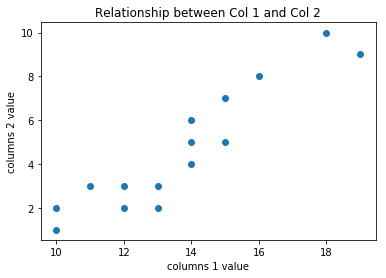

In [47]:
plt.scatter(X, y)

plt.xlabel("columns 1 value")
plt.ylabel("columns 2 value")
plt.title("Relationship between Col 1 and Col 2")

## 2.การสร้างสมการ Regression

สมการ Linear regression คือ y = β0 + Xβ1 <br/>
<strong>อธิบาย</strong><br/>
X = 'A'<br/>
y = 'B'<br/>
ทำการสร้างสร้างสมการเส้นตรงที่สามารถลากผ่าน X และ y ที่มีความเหมาะสมมากที่สุด โดยใช้ฟังก์ชัน fit() ใน smf.ols

In [48]:
model = smf.ols(formula="y ~ X", data=df)
results = model.fit()

results.params

Intercept   -8.887208
X            0.986933
dtype: float64

### แสดงค่าสัมประสิทธิการถดถอยที่ได้จากการ fit()
β0 - Intercept (ค่าคงที่)<br/>
β1 - Coef

In [49]:
print("β0 - Model intercept : %.3f" %results.params.Intercept)
print("β1 - Model slope :     %.3f" %results.params.X)
print('R2 : %.3f' %results.rsquared)

β0 - Model intercept : -8.887
β1 - Model slope :     0.987
R2 : 0.864


### นำเสนอค่าทางสถิติที่เกี่ยวข้องกับโมเดลการทำนายที่สร้างขึ้น และตาราง ANOVA

In [50]:
print(results.summary())

anova_results = anova_lm(results)

print('\n\nANOVA results')
print(anova_results)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.864
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     82.28
Date:                Wed, 04 Apr 2018   Prob (F-statistic):           5.51e-07
Time:                        23:23:10   Log-Likelihood:                -21.242
No. Observations:                  15   AIC:                             46.48
Df Residuals:                      13   BIC:                             47.90
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.8872      1.520     -5.848      0.0

/Users/phisan/anaconda/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  "anyway, n=%i" % int(n))
/Users/phisan/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/phisan/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/phisan/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)


### สร้างเส้นตรงที่ลากผ่านข้อมูลจากสมการเส้นตรง
สมการ Linear regression คือ <br/>
y = β0 + Xβ1 <br/><br/>

β0 - Intercept (ค่าคงที่)<br/>
β1 - Coef (ค่าสัมประสิทธิการถดถอย) <br/>

ดังนั้นการ Implement ในโปรแกรมจะได้ empression ที่ใช้สามารเส้นตรงคือ<br/>
yfit = intercept + Xfit*coef

In [51]:
# Retrieve the parameter estimates
intercept, coef = results.params

In [52]:
Xfit = np.linspace(X.min(), X.max(), len(X))
yfit = intercept + Xfit*coef

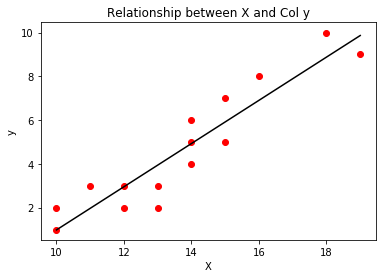

In [53]:
plt.scatter(X, y, color='r')

plt.title("Relationship between X and Col y")
plt.plot(Xfit, yfit, color='k')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

## 3.ใช้สมการ Linear Regression ที่ได้ทำนายข้อมูล

<ul>
<li>จำลอง X_prdict ขึ้นมาด้วยการสุ่มโดยจะต้องอยู่ในช่วงข้อมูลเดียวกับชุดข้อมูลต้นฉบับที่นำมาสร้างโมเดล</li>
<li>นำ X_predict ที่จำลองขึ้นไปทดสอบการทำนายโดยโมลที่สร้างขึ้นมา</li>
</ul>

In [54]:
X_predict = np.random.uniform(X.min(), X.max(), len(X))

y_predict = results.predict(sm.add_constant(X_predict), transform=False)

### นำเสนอความสัมพันธ์ระหว่าง X_predict และ y_predict ในรูปแบบตารางโดยใช้ Data Frame

In [55]:
df_predict = pd.DataFrame({'X_predict': X_predict, 'Y_Predicted': y_predict})  

df_predict

,X_predict,Y_Predicted
0,12.960959,3.904385
1,10.929519,1.899491
2,15.745789,6.652824
3,15.872347,6.777729
4,11.356192,2.320588
5,16.356512,7.255567
6,15.033770,5.950110
7,10.409075,1.385847
8,15.435987,6.347071
9,16.775797,7.669373


### นำเสนอความสัมพันธ์ระหว่าง X_predict , y_predict และข้อมูลที่นำมาสร้างโมเดล ในรูปแบบตารางโดยกราฟ

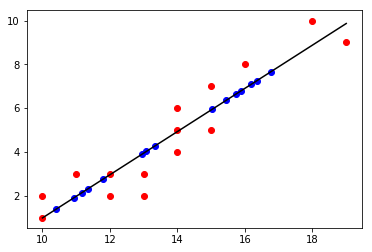

In [56]:
plt.scatter(X, y, color='r')
plt.scatter(X_predict, y_predict, color='b')
plt.plot(Xfit, yfit, color='k');

## 4.ประเมินความแม่นย้ำในการทำนายของโมเดล
ข้อกำหนด จำนวนของ y_predict จะต้องเท่ากับจำนวน y

In [57]:
print('Mean Absolute Error: %.2f' % metrics.mean_absolute_error(y, y_predict))  
print('Mean Squared Error: %.2f' % metrics.mean_squared_error(y, y_predict))  
print('Root Mean Squared Error: %.2f' % np.sqrt(metrics.mean_squared_error(y, y_predict)))

Mean Absolute Error: 3.08
Mean Squared Error: 14.32
Root Mean Squared Error: 3.78
